# Array Data

*Author: Creare* <br>
*Date: April 01 2020* <br>

**Keywords**: podpac, DataSource, Array

## Overview

Reference tutorial for loading Array data with the `podpac.data.Array` Node.

### Prerequisites

- Python 2.7 or above
- [`podpac`](https://podpac.org/install.html#install)
- *Review the [README.md](../../README.md) and [jupyter-tutorial.ipynb](../jupyter-tutorial.ipynb) for additional info on using jupyter notebooks*

### See Also

- [0-concepts/introduction.ipynb](../0-concepts/introduction.ipynb): PODPAC introduction
- [0-concepts/coordinates.ipynb](../0-concepts/coordinates.ipynb): PODPAC Coordinates reference
- [`podpac.data.Array` API Reference](https://podpac.org/api/podpac.data.Array.html#podpac.data.Array)

## Array Data

In [1]:
# plot inline
%matplotlib inline

import podpac
import numpy as np

In [2]:
# create mock numpy array data
data = np.random.rand(5, 5)
data

array([[0.35094566, 0.10306326, 0.31674056, 0.15695824, 0.21146349],
       [0.24873832, 0.3089763 , 0.46747078, 0.23612607, 0.64935767],
       [0.53687121, 0.60324858, 0.30902533, 0.98007456, 0.67090794],
       [0.05882164, 0.18307798, 0.79990617, 0.29424941, 0.81792261],
       [0.92751062, 0.84419354, 0.30975629, 0.60506475, 0.06056753]])

In [3]:
# create coordinates for data
lat = np.linspace(-10, 10, 5)
lon = np.linspace(-10, 10, 5)
native_coords = podpac.Coordinates([lat, lon], ['lat', 'lon'])
native_coords

Coordinates (EPSG:4326)
	lat: ArrayCoordinates1d(lat): Bounds[-10.0, 10.0], N[5]
	lon: ArrayCoordinates1d(lon): Bounds[-10.0, 10.0], N[5]

In [4]:
# create Array DataSource node
node = podpac.data.Array(source=data, coordinates=native_coords)
node

<Array(shape=(5, 5), interpolation='nearest')>

In [5]:
# evaluate this note at its coordinates
output = node.eval(node.coordinates)
output

<xarray.UnitsDataArray (lat: 5, lon: 5)>
array([[0.35094566, 0.10306326, 0.31674056, 0.15695824, 0.21146349],
       [0.24873832, 0.3089763 , 0.46747078, 0.23612607, 0.64935767],
       [0.53687121, 0.60324858, 0.30902533, 0.98007456, 0.67090794],
       [0.05882164, 0.18307798, 0.79990617, 0.29424941, 0.81792261],
       [0.92751062, 0.84419354, 0.30975629, 0.60506475, 0.06056753]])
Coordinates:
  * lat      (lat) float64 -10.0 -5.0 0.0 5.0 10.0
  * lon      (lon) float64 -10.0 -5.0 0.0 5.0 10.0
Attributes:
    layer_style:   <podpac.core.style.Style object at 0x0000013A36AE4688>
    crs:           EPSG:4326
    geotransform:  (-12.5, 5.0, 0.0, -12.5, 0.0, 5.0)

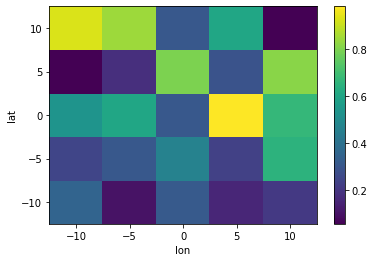

In [6]:
output.plot()
pass

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


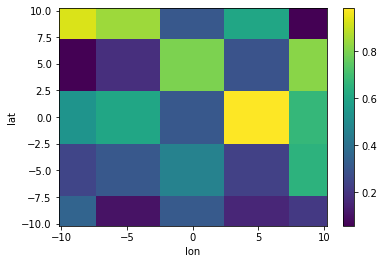

In [7]:
# scale down data (higher resolution)
# default interpolation is nearest neighbor
coords = podpac.Coordinates([np.linspace(-10, 10, 50), np.linspace(-10, 10, 50)], ['lat', 'lon'])
output = node.eval(coords)
output.plot()
pass

In [8]:
# create Array DataSource node with  bilinear interpolation to scale down (higher resolution) 
node = podpac.data.Array(source=data, coordinates=native_coords, interpolation="bilinear")
node

<Array(shape=(5, 5), interpolation='bilinear')>

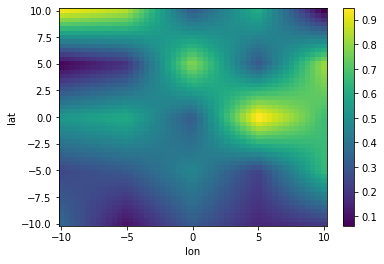

In [9]:
output = node.eval(coords)
output.plot()
pass